<a href="https://colab.research.google.com/github/kesiagabriele/DSA_COMPFEST/blob/main/CodeDSA_KelompokKDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Korelasi dalam Menentukan Hubungan antara Pandemi COVID-19 dengan Jumlah Kedatangan Wisatawan Mancanegara**
###**Data Science Academy Compfest - Kelompok KDA:**
1. Kesia Gabriele
2. Ruth Intan Davina
3. Maria Angelica Christabel

###**Problem Statement**
1. Bagaimana korelasi antara jumlah kasus positif COVID-19 bulanan di Indonesia dengan jumlah wisatawan mancanegara ke Indonesia?
2. Bagaimana korelasi antara tingkat vaksinasi COVID-19 di Indonesia dengan jumlah wisatawan mancanegara ke Indonesia?
3. Apakah ada pengaruh penerapan kebijakan bebas visa kunjungan (BVK) terhadap jumlah kasus positif COVID-19 di Indonesia?

## **DATA CLEANING AND PREPROCESSING**

In [4]:
#Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

### **Data COVID-19 Indonesia**

In [5]:
df = pd.read_csv('/content/Daily Update Data Agregat Covid-19 Jakarta.csv')
df.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,1/29/2020,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3/1/2020,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3/2/2020,2.0,2.0,0.0,0.0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
3,3/3/2020,2.0,2.0,0.0,0.0,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
4,3/4/2020,2.0,2.0,0.0,0.0,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Slicing Data (hanya ingin data COVID-19 Indonesia Maret 2020 - Maret 2023)
df.drop(df.columns[[5,6,7,8,9,10,15,16,17,18,19,20]], axis=1,inplace = True)
df = df[1:1127]
df

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
1,3/1/2020,0.0,0.0,0.0,0.0,0,0,0,0
2,3/2/2020,2.0,2.0,0.0,0.0,2,2,0,0
3,3/3/2020,2.0,2.0,0.0,0.0,0,0,0,0
4,3/4/2020,2.0,2.0,0.0,0.0,0,0,0,0
5,3/5/2020,2.0,2.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1122,3/27/2023,6744362.0,4425.0,6578937.0,161000.0,329,-107,430,6
1123,3/28/2023,6744873.0,4755.0,6579113.0,161005.0,511,330,176,5
1124,3/29/2023,6745453.0,4861.0,6579584.0,161008.0,580,106,471,3
1125,3/30/2023,6746009.0,5012.0,6579985.0,161012.0,556,151,401,4


In [7]:
#Ubah Tipe Data
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)

<ipython-input-7-3a248980dcaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])
<ipython-input-7-3a248980dcaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)
<ipython-input-7-3a248980dcaf>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns

In [8]:
#Re-Check Tipe Data dan Missing Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 1 to 1126
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Tanggal                       1126 non-null   datetime64[ns]
 1   Positif (Indonesia)           1126 non-null   int64         
 2   Dirawat (Indonesia)           1126 non-null   int64         
 3   Sembuh (Indonesia)            1126 non-null   int64         
 4   Meninggal (Indonesia)         1126 non-null   int64         
 5   Positif Harian (Indonesia)    1126 non-null   int64         
 6   Dirawat Harian (Indonesia)    1126 non-null   int64         
 7   Sembuh Harian (Indonesia)     1126 non-null   int64         
 8   Meninggal Harian (Indonesia)  1126 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 79.3 KB


### **Data COVID-19 Bulanan Indonesia**

Note: Karena ingin membuat analisis korelasi dan data BPS yang tersedia merupakan data bulanan, maka data harian COVID-19 sebelumnya diakumulasi menjadi data bulanan.

In [9]:
df_monthly = pd.read_csv('/content/data_covidbulanan.csv')
df_monthly.head()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Bulanan (Indonesia),Dirawat Bulanan (Indonesia),Sembuh Bulanan (Indonesia),Meninggal Bulanan (Indonesia)
0,2/28/2020,0,0,0,0,0,0,0,0
1,3/31/2020,1528,1311,81,136,1528,1311,81,136
2,4/30/2020,10118,7804,1522,792,8590,6493,1441,656
3,5/31/2020,26473,17552,7308,1613,16355,9748,5786,821
4,6/30/2020,56385,28703,24806,2876,29912,11151,17498,1263


In [10]:
#Ubah Tipe Data
df_monthly['Tanggal'] = pd.to_datetime(df_monthly['Tanggal'])
df_monthly['Bulan'] = df_monthly['Tanggal'].apply(lambda x: x.strftime('%B-%Y'))

#Re-Check Tipe Data dan Missing Value
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Tanggal                        38 non-null     datetime64[ns]
 1   Positif (Indonesia)            38 non-null     int64         
 2   Dirawat (Indonesia)            38 non-null     int64         
 3   Sembuh (Indonesia)             38 non-null     int64         
 4   Meninggal (Indonesia)          38 non-null     int64         
 5   Positif Bulanan (Indonesia)    38 non-null     int64         
 6   Dirawat Bulanan (Indonesia)    38 non-null     int64         
 7   Sembuh Bulanan (Indonesia)     38 non-null     int64         
 8   Meninggal Bulanan (Indonesia)  38 non-null     int64         
 9   Bulan                          38 non-null     object        
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 3.1+ KB


###**Data Vaksin COVID-19 Bulanan Indonesia**

In [11]:
df_vaccine = pd.read_csv('/content/data_vaksinkumulatif.csv')
df_vaccine.head()

,Tanggal,% Vaksinasi 1 dari Target,Vaksin 1 Kumulatif,Vaksin 1 Bulanan,%Vaksinasi 2 dari Target,Vaksin 2 Kumulatif,Vaksin 2 Bulanan,%Vaksinasi 3 dari Target,Vaksin 3 Kumulatif,Vaksin 3 Bulanan,%Vaksinasi 4 dari Target,Vaksin 4 Kumulatif,Vaksin 4 Bulanan
0,1/31/2021,0.25,586665,586665,0.00,0,0,0.0,0,0,0.0,0,0
1,2/28/2021,0.82,1924261,1337596,0.47,1102930,1384530,0.0,0,0,0.0,0,0
2,3/31/2021,1.70,3989322,2065061,1.70,3989322,2041594,0.0,0,0,0.0,0,0
3,4/30/2021,5.47,12836231,8846909,3.41,8002111,4012789,0.0,0,0,0.0,0,0
4,5/31/2021,7.32,17177553,4341321,4.77,11193569,3191458,0.0,0,0,0.0,0,0


In [12]:
#Hapus Baris Nan
df_vaccine.dropna(inplace=True)

#Ubah Tipe Data
df_vaccine['Tanggal'] = pd.to_datetime(df_vaccine['Tanggal'])
df_vaccine['Bulan'] = df_vaccine['Tanggal'].apply(lambda x: x.strftime('%B-%Y'))

#Re-Check Tipe Data dan Missing Value
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal                    27 non-null     datetime64[ns]
 1   % Vaksinasi 1 dari Target  27 non-null     float64       
 2   Vaksin 1 Kumulatif         27 non-null     int64         
 3   Vaksin 1 Bulanan           27 non-null     int64         
 4   %Vaksinasi 2 dari Target   27 non-null     float64       
 5   Vaksin 2 Kumulatif         27 non-null     int64         
 6   Vaksin 2 Bulanan           27 non-null     int64         
 7   %Vaksinasi 3 dari Target   27 non-null     float64       
 8   Vaksin 3 Kumulatif         27 non-null     int64         
 9   Vaksin 3 Bulanan           27 non-null     int64         
 10  %Vaksinasi 4 dari Target   27 non-null     float64       
 11  Vaksin 4 Kumulatif         27 non-null     int64         
 12  Vaksin 4 B

### **Data Kunjungan Wisatawan Mancanegara per bulan Menurut Kebangsaan**

In [13]:
df_tourist = pd.read_csv('/content/data_wisatawan.csv')
df_tourist.head()

,Bulan,Total,Asia,Eropa,Afrika,America,Australia
0,2019-01,1201735,903513,127191,5757,45865,119409
1,2019-02,1243996,976170,131240,4728,42999,88859
2,2019-03,1311911,987426,151408,6296,58878,107903
3,2019-04,1274231,926801,169529,7759,52104,118038
4,2019-05,1249536,919227,142290,5480,56404,126135


In [14]:
#Ubah Tipe Data
df_tourist['Bulan'] = pd.to_datetime(df_tourist['Bulan'], format='%Y-%m') + pd.offsets.MonthEnd(1)

In [15]:
#Re-Check Tipe Data dan Missing Value
df_tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Bulan      51 non-null     datetime64[ns]
 1   Total      51 non-null     int64         
 2   Asia       51 non-null     int64         
 3   Eropa      51 non-null     int64         
 4   Afrika     51 non-null     int64         
 5   America    51 non-null     int64         
 6   Australia  51 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 2.9 KB


##**EXPLORATORY DATA ANALYSIS**

###**Statistika Deskriptif**

In [16]:
df_monthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Positif (Indonesia),38.0,3.411489e+06,2.650830e+06,0.0,589961.75,4152452.5,6080088.25,6746474.0
Dirawat (Indonesia),38.0,8.180882e+04,1.265752e+05,0.0,8409.25,39379.0,101557.75,554698.0
Sembuh (Indonesia),38.0,3.237694e+06,2.592268e+06,0.0,490662.75,3898760.5,5910055.50,6580228.0
Meninggal (Indonesia),38.0,9.198684e+04,6.764978e+04,0.0,18243.25,137481.0,156700.50,161020.0
Positif Bulanan (Indonesia),38.0,1.775388e+05,2.863619e+05,0.0,19579.75,81733.0,167987.75,1231386.0
Dirawat Bulanan (Indonesia),38.0,1.375263e+02,1.400597e+05,-447771.0,-15897.75,1548.5,13623.75,486102.0
Sembuh Bulanan (Indonesia),38.0,1.731639e+05,2.580038e+05,0.0,16391.00,94436.0,170872.75,990405.0
Meninggal Bulanan (Indonesia),38.0,4.237368e+03,8.303188e+03,0.0,356.75,1231.0,4684.75,38904.0


In [17]:
df.loc[df['Positif Harian (Indonesia)'] == 64718]

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia)
718,2022-02-16,4966046,445190,4375234,145622,64718,39165,25386,167


In [18]:
df_monthly.loc[df_monthly['Positif Bulanan (Indonesia)'] == 1231386]

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Positif Bulanan (Indonesia),Dirawat Bulanan (Indonesia),Sembuh Bulanan (Indonesia),Meninggal Bulanan (Indonesia),Bulan
17,2021-07-31,3409658,545447,2770092,94119,1231386,306079,889679,35628,July-2021


Berdasarkan data, tercatat bahwa jumlah kasus positif bulanan di Indonesia tertinggi mencapai 1.206.550 kasus pada bulan Juli 2021.

In [19]:
df_tourist.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total,51.0,586540.372549,506600.828401,105788.0,147560.5,354920.0,1077102.0,1530268.0
Asia,51.0,425148.549020,352564.314945,97947.0,133007.0,240566.0,788386.0,1073558.0
Eropa,51.0,76718.509804,75878.415078,1844.0,5259.0,56801.0,142722.0,237072.0
Afrika,51.0,3120.803922,3553.089630,50.0,170.0,1837.0,5315.0,13511.0
America,51.0,23239.215686,22476.222000,1155.0,2229.0,17613.0,45043.5,59506.0
Australia,51.0,58313.294118,59358.216361,1027.0,2314.0,38103.0,106798.0,165743.0


In [20]:
df_tourist.loc[df_tourist['Total'] == 1530268]

,Bulan,Total,Asia,Eropa,Afrika,America,Australia
7,2019-08-31,1530268,1073558,237072,10850,55193,153595


Berdasarkan data, tercatat bahwa jumlah kedatangan mancanegara  tertinggi ke Indonesia mencapai 1.530.268 pada bulan Agustus 2019, yang terjadi sebelum munculnya pandemi Covid-19.

In [21]:
df_tourist.loc[df_tourist['Total'] == 105788]

,Bulan,Total,Asia,Eropa,Afrika,America,Australia
25,2021-02-28,105788,97947,3303,130,1787,2621


Berdasarkan data, tercatat bahwa jumlah kedatangan mancanegara terendah ke Indonesia yaitu 105.788 pada bulan Februari 2021.

In [22]:
df_vaccine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
% Vaksinasi 1 dari Target,27.0,5.884185e+01,3.476511e+01,0.25,2.446000e+01,8.263000e+01,8.662000e+01,8.686000e+01
Vaksin 1 Kumulatif,27.0,1.380818e+08,8.158191e+07,586665.00,5.739931e+07,1.939045e+08,2.032677e+08,2.038309e+08
Vaksin 1 Bulanan,27.0,7.549293e+06,9.817485e+06,23467.00,4.341320e+05,2.041594e+06,1.510076e+07,2.968525e+07
%Vaksinasi 2 dari Target,27.0,4.682556e+01,3.065212e+01,0.00,1.270000e+01,6.370000e+01,7.399000e+01,7.451000e+01
Vaksin 2 Kumulatif,27.0,1.098841e+08,7.193051e+07,0.00,2.980258e+07,1.494823e+08,1.736294e+08,1.748614e+08
Vaksin 2 Bulanan,27.0,6.455488e+06,7.792325e+06,0.00,4.810655e+05,2.041594e+06,1.404476e+07,2.295034e+07
%Vaksinasi 3 dari Target,27.0,1.583000e+01,1.653026e+01,0.00,2.150000e-01,6.830000e+00,3.449000e+01,3.782000e+01
Vaksin 3 Kumulatif,27.0,3.714763e+07,3.879090e+07,0.00,5.045320e+05,1.602769e+07,8.093631e+07,8.875069e+07
Vaksin 3 Bulanan,27.0,3.287063e+06,5.321074e+06,0.00,1.173330e+05,7.274650e+05,5.115719e+06,2.191781e+07
%Vaksinasi 4 dari Target,27.0,2.359259e-01,4.641556e-01,0.00,0.000000e+00,1.000000e-02,3.050000e-01,1.710000e+00


###**Grafik Perkembangan Kasus COVID-19 di Indonesia**

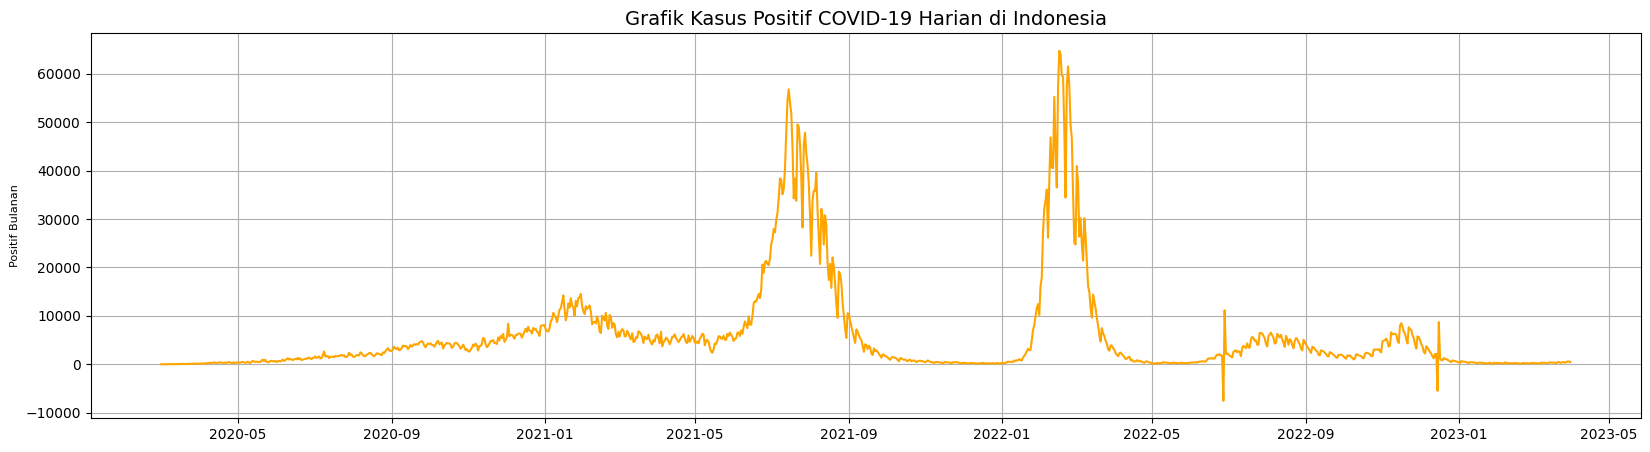

In [23]:
#Grafik Kasus Positif COVID-19 Harian di Indonesia
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,5))
x.plot(df['Tanggal'], df['Positif Harian (Indonesia)'], 'orange')
plt.title('Grafik Kasus Positif COVID-19 Harian di Indonesia', fontsize=14)
plt.ylabel('Positif Bulanan', fontsize=8)
plt.grid(True)
plt.show()


Dalam visualisasi grafik kasus positif harian Indonesia di atas, terlihat adanya lonjakan yang signifikan pada bulan Juli 2021. Lonjakan ini pun terjadi karena adanya peningkatan kasus COVID-19 yang disebabkan oleh munculnya varian delta pada akhir Juli. Varian delta, yang lebih menular, memicu peningkatan tajam dalam penyebaran virus di wilayah tersebut.

Selanjutnya, terjadi lonjakan kedua pada sekitar bulan Februari 2022, yang terjadi bersamaan dengan kemunculan varian baru, yaitu Omicron. Varian Omicron menjadi perhatian karena memiliki kemampuan penyebaran yang cepat dan telah terdeteksi di berbagai negara. Lonjakan ini dapat dikaitkan dengan peningkatan kasus COVID-19 yang disebabkan oleh varian Omicron di Indonesia.

Namun, setelah mencapai puncak lonjakan pada bulan Februari 2022, grafik kasus positif harian Jakarta mengalami penurunan yang stabil hingga tahun 2023. Hal ini menunjukkan adanya keberhasilan dalam mengendalikan penyebaran virus dan efektivitas langkah-langkah pencegahan yang diimplementasikan. Penurunan yang stabil ini memberikan indikasi bahwa kasus COVID-19 di Indonesia sedang mengalami penurunan secara keseluruhan.

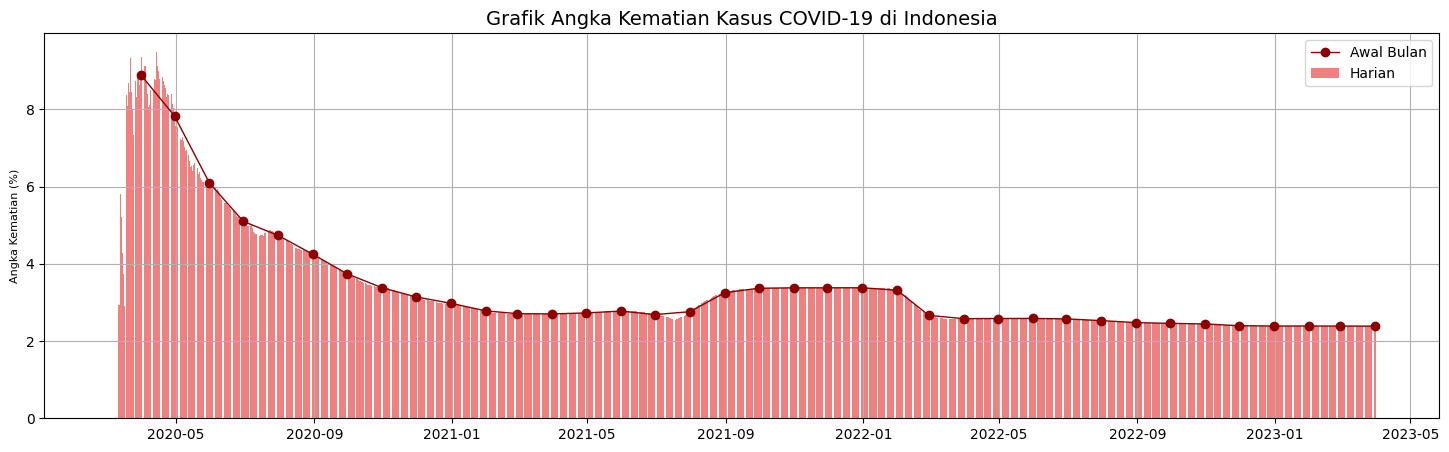

In [24]:
#Grafik Angka Kematian Kasus COVID-19 di Indonesia
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(18,5))
df['Angka Kematian'] = df['Meninggal (Indonesia)']/df['Positif (Indonesia)']*100
x.bar(df['Tanggal'], df['Angka Kematian'], color='lightcoral', label='Harian', width = 0.8)
x.plot(df_monthly['Tanggal'], df_monthly['Meninggal (Indonesia)']/df_monthly['Positif (Indonesia)']*100, color='darkred', marker='o', linestyle='-', linewidth=1, label='Awal Bulan')
plt.title('Grafik Angka Kematian Kasus COVID-19 di Indonesia', fontsize=14)
plt.ylabel('Angka Kematian (%)', fontsize=8)
plt.grid(True)
plt.legend()
plt.show()

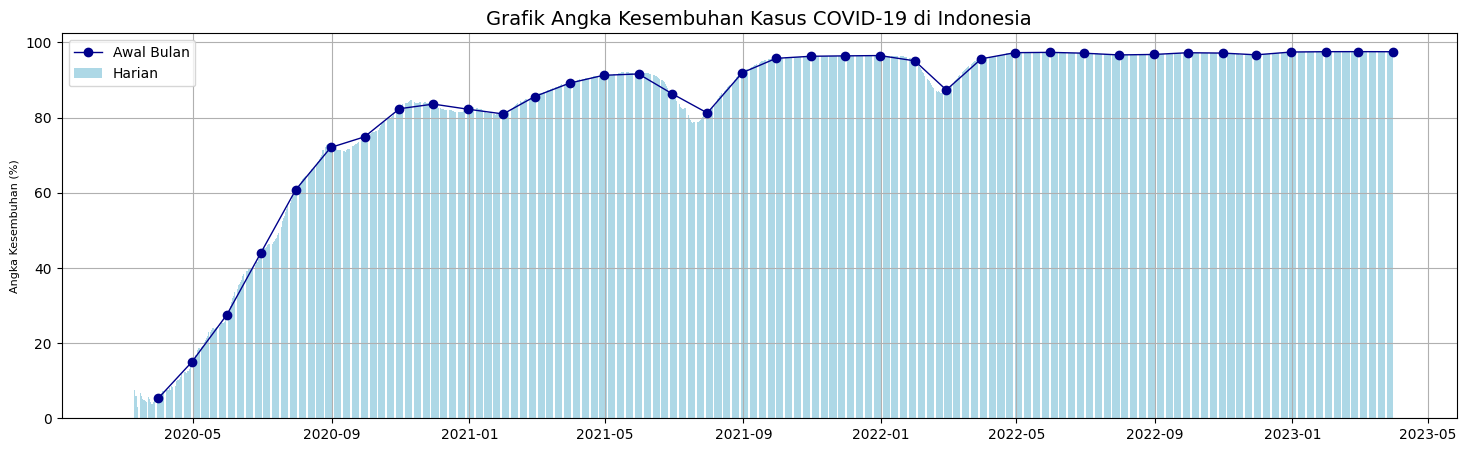

In [25]:
#Grafik Angka Kesembuhan Kasus COVID-19 di Indonesia
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(18,5))
df['Angka Kesembuhan'] = df['Sembuh (Indonesia)']/df['Positif (Indonesia)']*100
x.bar(df['Tanggal'], df['Angka Kesembuhan'], color='lightblue', label='Harian', width = 0.8)
x.plot(df_monthly['Tanggal'], df_monthly['Sembuh (Indonesia)']/df_monthly['Positif (Indonesia)']*100, color='darkblue', marker='o', linestyle='-', linewidth=1, label='Awal Bulan')
plt.title('Grafik Angka Kesembuhan Kasus COVID-19 di Indonesia', fontsize=14)
plt.ylabel('Angka Kesembuhan (%)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

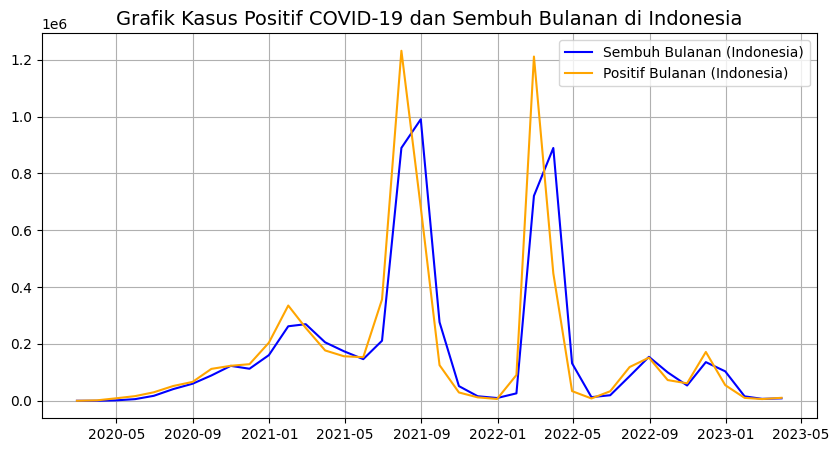

In [26]:
#Grafik Kasus Positif COVID-19 dan Sembuh Bulanan di Indonesia
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(10,5))
x.plot(df_monthly['Tanggal'], df_monthly['Sembuh Bulanan (Indonesia)'], 'blue', label="Sembuh Bulanan (Indonesia)")
x.plot(df_monthly['Tanggal'], df_monthly['Positif Bulanan (Indonesia)'], 'orange', label="Positif Bulanan (Indonesia)")
plt.title('Grafik Kasus Positif COVID-19 dan Sembuh Bulanan di Indonesia', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Dari hasil visualisasi grafik di atas, terlihat perbandingan antara jumlah kasus positif bulanan dan jumlah kasus sembuh bulanan di Indonesia tidak terlalu berbeda, bahkan terdapat kasus sembuh yang lebih tinggi dibandingkan kasus positif bulanan. Fenomena ini memberikan indikasi bahwa penanganan COVID-19 di Indonesia telah berjalan dengan cukup baik dan efektif. Hal ini menunjukkan adanya upaya yang kuat dan berhasil dalam merespons pandemi, termasuk langkah-langkah pencegahan, pengendalian, serta upaya dalam memperkuat sistem perawatan dan pemulihan kesehatan masyarakat.

###**Outlier**

<Axes: >

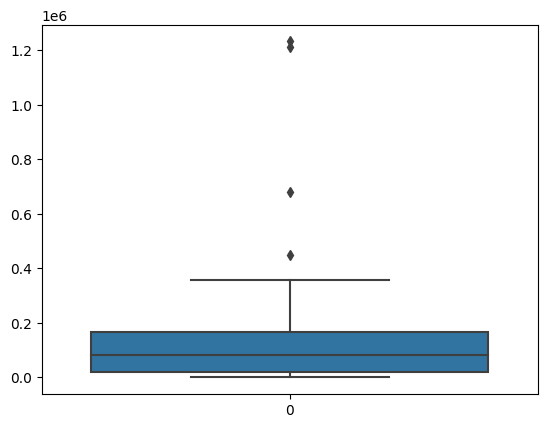

In [27]:
sns.boxplot(df_monthly['Positif Bulanan (Indonesia)'])

Outliers pada grafik menunjukkan adanya lonjakan jumlah kasus positif bulanan di Jakarta yang jauh melebihi angka biasanya, yang menandakan adanya situasi yang luar biasa atau kejadian yang tidak umum terkait dengan penyebaran COVID-19 di periode waktu tersebut.

In [28]:
Q1 = df_monthly['Positif Bulanan (Indonesia)'].quantile(0.25)
Q3 = df_monthly['Positif Bulanan (Indonesia)'].quantile(0.75)
IQR = Q3 - Q1
outliers_=(df_monthly['Positif Bulanan (Indonesia)'] > Q3  + 1.5*IQR) # outliers atas
outlier = df_monthly.loc[outliers_]
outlier[['Bulan','Positif Bulanan (Indonesia)']]

,Bulan,Positif Bulanan (Indonesia)
17,July-2021,1231386
18,August-2021,680143
24,February-2022,1211078
25,March-2022,448370


Dari hasil di atas, terlihat adanya outlier yang mencolok pada bulan Juli hingga Agustus 2021, serta bulan Februari hingga Maret 2022. Outlier ini menunjukkan peningkatan yang signifikan dalam jumlah kasus COVID-19 dibandingkan dengan tingkat biasa pada periode waktu tersebut. Temuan ini juga konsisten dengan hasil analisis data grafik sebelumnya yang telah dilakukan yang terdapat perubahan tren dan lonjakan kasus yang terjadi pada periode waktu tersebut.

### **Grafik Vaksin Kumulatif di Indonesia**

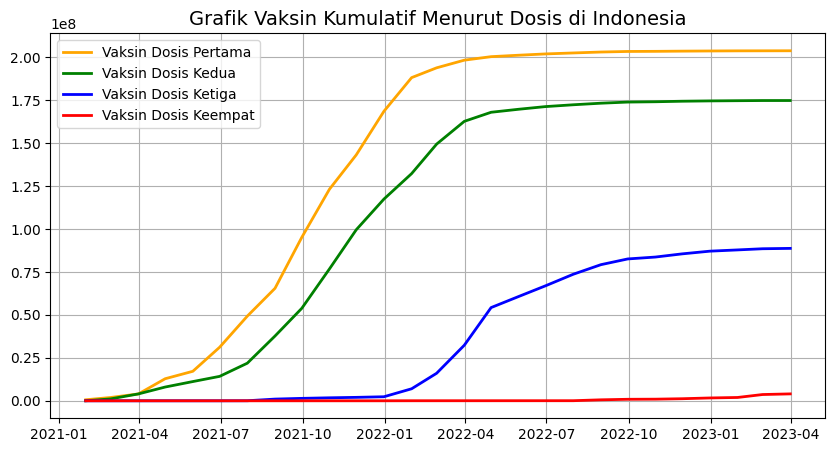

In [29]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(10,5))
x.plot(df_vaccine['Tanggal'], df_vaccine['Vaksin 1 Kumulatif'], color='orange', linestyle='-', linewidth=2, label='Vaksin Dosis Pertama')
x.plot(df_vaccine['Tanggal'], df_vaccine['Vaksin 2 Kumulatif'], color='green', linestyle='-', linewidth=2, label='Vaksin Dosis Kedua')
x.plot(df_vaccine['Tanggal'], df_vaccine['Vaksin 3 Kumulatif'], color='blue', linestyle='-', linewidth=2, label='Vaksin Dosis Ketiga')
x.plot(df_vaccine['Tanggal'], df_vaccine['Vaksin 4 Kumulatif'], color='red', linestyle='-', linewidth=2, label='Vaksin Dosis Keempat')
plt.title('Grafik Vaksin Kumulatif Menurut Dosis di Indonesia', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Cakupan vaksinasi Indonesia berkembang secara pesat dan mencapai 200.000.000 pada Bulan April 2022, melebihi target WHO.

###**Grafik Kunjungan Wisatawan Mancanegara**

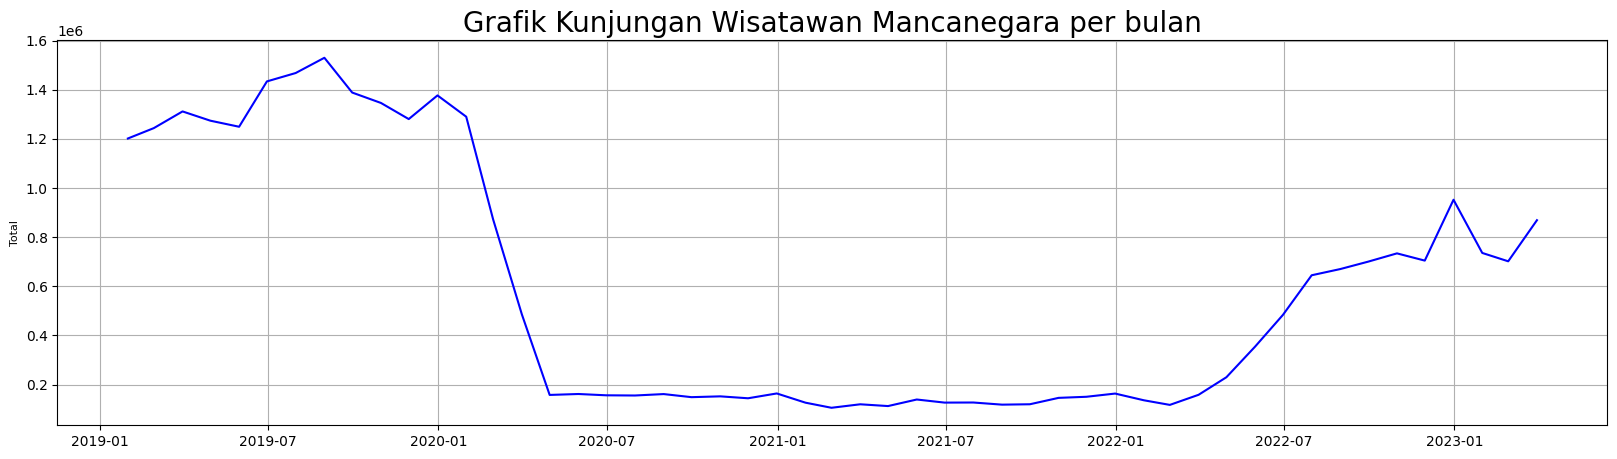

In [30]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(20,5))
x.plot(df_tourist['Bulan'], df_tourist['Total'], 'b')
plt.title('Grafik Kunjungan Wisatawan Mancanegara per bulan', fontsize=20)
plt.ylabel('Total', fontsize=8)
plt.grid(True)
plt.show()

Dalam grafik di atas, terlihat bahwa grafik kunjungan wisatawan mulai menunjukkan penurunan yang signifikan pada awal tahun 2020. Fenomena ini sejalan dengan fakta bahwa COVID-19 memasuki Indonesia sekitar bulan Maret 2020 dan memiliki dampak yang signifikan terhadap sektor pariwisata dan kunjungan wisatawan ke negara ini. Pandemi ini menyebabkan pembatasan perjalanan internasional, penutupan tempat-tempat wisata, dan ketidakpastian yang signifikan dalam hal keamanan perjalanan.

Selanjutnya, hingga tahun 2022, grafik kunjungan wisatawan tetap menunjukkan tingkat yang stabil dan rendah. Hal ini disebabkan oleh penerapan kebijakan PPKM dan langkah-langkah lainnya untuk mengendalikan penyebaran virus. Pembatasan perjalanan, karantina wilayah, dan aturan sosial-distancing telah mengurangi mobilitas dan minat wisatawan untuk mengunjungi Indonesia.

Namun, pada pertengahan tahun 2022, grafik kunjungan wisatawan mulai menunjukkan peningkatan yang menandakan adanya perbaikan dalam situasi pandemi dan pemulihan sektor pariwisata. Mungkin terdapat kebijakan perjalanan yang lebih longgar, vaksinasi yang lebih luas, serta adopsi protokol kesehatan yang ketat untuk menjaga keamanan para wisatawan.

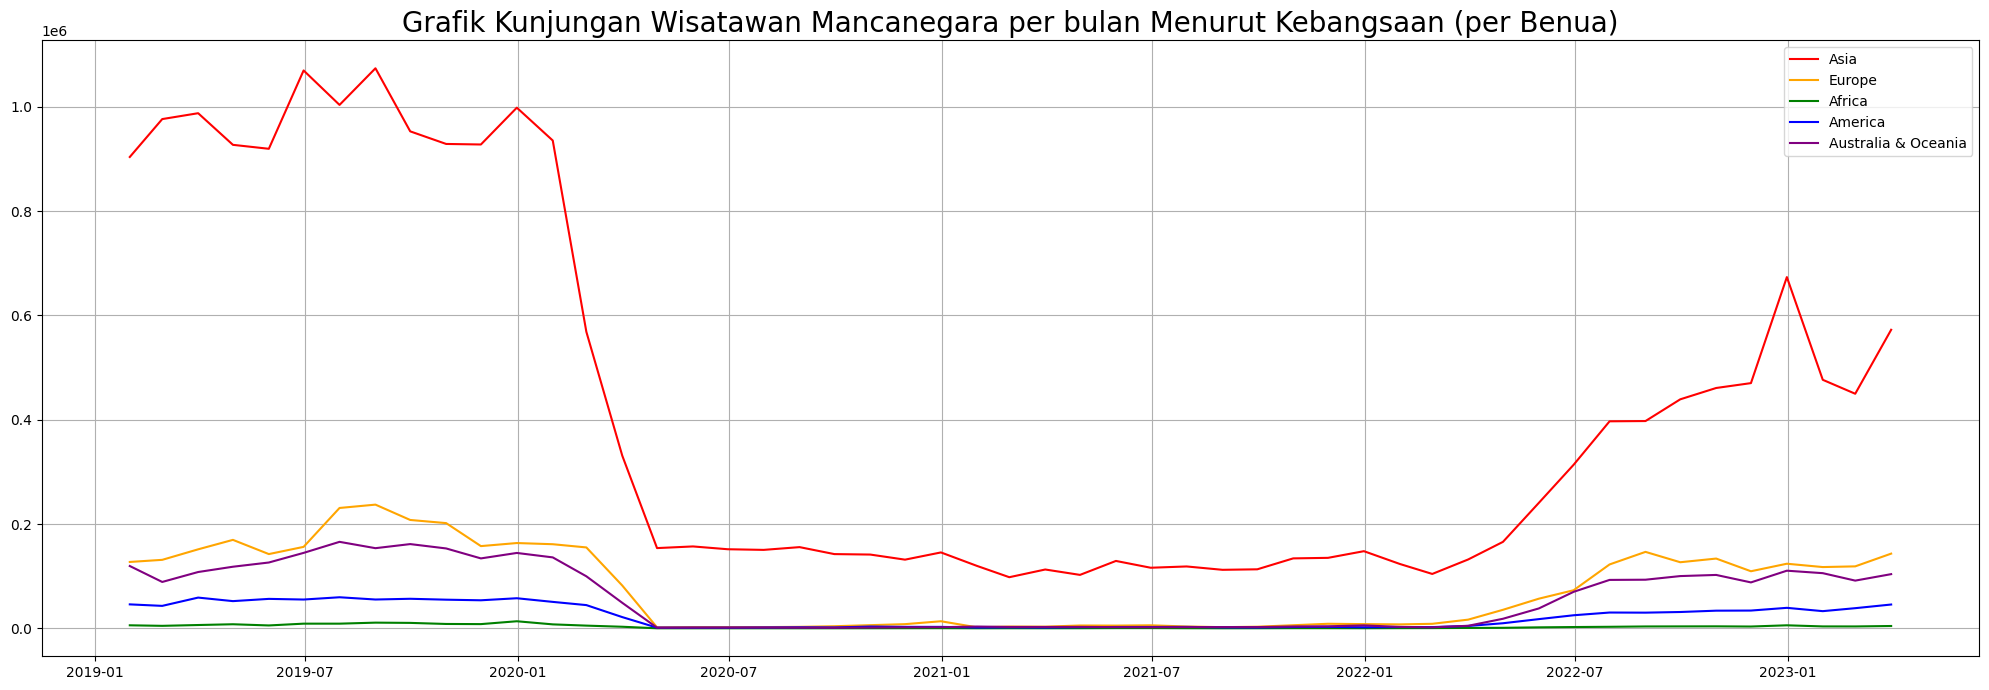

In [31]:
fig,x = plt.subplots(nrows=1, ncols = 1, figsize=(25,8))
x.plot(df_tourist['Bulan'], df_tourist['Asia'], 'red', label="Asia")
x.plot(df_tourist['Bulan'], df_tourist['Eropa'], 'orange',label="Europe")
x.plot(df_tourist['Bulan'], df_tourist['Afrika'], 'green',label="Africa")
x.plot(df_tourist['Bulan'], df_tourist['America'], 'blue',label="America")
x.plot(df_tourist['Bulan'], df_tourist['Australia'], 'purple',label="Australia & Oceania")
plt.title('Grafik Kunjungan Wisatawan Mancanegara per bulan Menurut Kebangsaan (per Benua)', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan grafik, terlihat bahwa jumlah wisatawan mancanegara terbanyak berasal dari benua Asia. Secara simultan, terjadi penurunan signifikan jumlah wisatawan dari semua benua pada triwulan II tahun 2020 karena munculnya Covid-19 di Indonesia dan mulai mengalami peningkatan kembali pada triwulan II tahun 2022 meskipun belum mencapai tingkat sebelum pandemi Covid-19. Penyebab peningkatan ini juga dapat dikaitkan dengan kebijakan bebas visa kunjungan (BVK) yang diberlakukan oleh pemerintah Indonesia kepada 169 negara, yang mulai diberlakukan lagi sejak Juni 2022. Kebijakan ini memberikan kemudahan akses bagi wisatawan mancanegara untuk berkunjung ke Indonesia dan berkontribusi terhadap peningkatan jumlah wisatawan.

##**Modelling**

Setelah melakukan Exploratory Data Analysis, kami telah mengamati adanya indikasi hubungan antara jumlah kasus positif bulanan di Indonesia, total vaksin kumulatif, dan tingkat kunjungan wisatawan. Oleh karena itu, guna memperoleh pemahaman yang lebih akurat, kami akan melanjutkan dengan melakukan perhitungan secara statistik melalui analisis korelasi. Hal ini bertujuan untuk mendapatkan informasi yang lebih rinci mengenai sejauh hubungan pandemi COVID-19 dan penyebaran varian tersebut terhadap kunjungan wisatawan di Indonesia.

Berikut ini adalah panduan untuk menginterpretasikan tingkat kekuatan analisis korelasi:
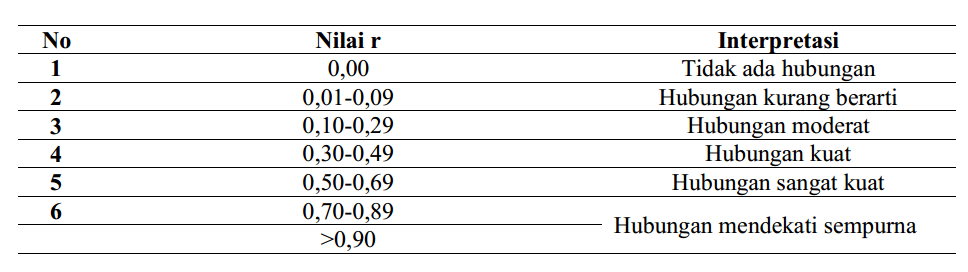

### **Analisis Korelasi antara Jumlah Kasus Positif Bulanan dengan Tingkat Kunjungan Wisatawan di Indonesia pada Rentang Waktu Pandemi COVID-19**

**HIPOTESIS**

H0 : Tidak ada korelasi yang kuat antara jumlah kasus positif baru bulanan dengan jumlah wisatawan.

H1 : Terdapat korelasi yang kuat antara jumlah kasus positif baru bulanan dengan jumlah wisatawan.


In [32]:
#Menghitung Korelasi
r_total = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['Total'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan Mancanegara adalah", r_total[0], "dengan p-value", r_total[1])

Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan Mancanegara adalah -0.5860597439544807 dengan p-value 0.000138251562910025


In [33]:
#Menghitung Korelasi untuk setiap Benua
r1 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['Asia'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Asia adalah", r1[0], "dengan p-value", r1[1])

r2 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['Eropa'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Eropa adalah", r2[0], "dengan p-value", r2[1])

r3 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['Afrika'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Afrika adalah", r3[0],"dengan p-value", r3[1])

r4 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['America'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Amerika adalah", r4[0],"dengan p-value", r4[1])

r5 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][1:], df_tourist['Australia'][14:])
print("Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Australia adalah", r5[0],"dengan p-value", r5[1])

Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Asia adalah -0.6363205310573731 dengan p-value 2.3042631747038563e-05
Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Eropa adalah -0.259601706970128 dengan p-value 0.12074967195530019
Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Afrika adalah -0.19288678262403267 dengan p-value 0.25270852690150475
Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Amerika adalah -0.2074442863916548 dengan p-value 0.2179565993554496
Korelasi Kasus Positif Bulanan Indonesia dengan Jumlah Wisatawan dari Benua Australia adalah -0.27596017069701273 dengan p-value 0.09827665364218818


### **Analisis Korelasi antara Total Vaksin Kumulatif dengan Tingkat Kunjungan Wisatawan di Indonesia pada Rentang Waktu Pandemi COVID-19**

**HIPOTESIS**

H0 : Tidak ada korelasi yang kuat antara total vaksin kumulatif dengan jumlah wisatawan.

H1 : Terdapat korelasi yang kuat antara total vaksin kumulatif dengan jumlah wisatawan.

In [34]:
r6 = stats.spearmanr(df_vaccine['Vaksin 1 Kumulatif'], df_tourist['Total'][24:])
print("Korelasi Vaksin Dosis Pertama (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah", r6[0], "dengan p-value", r6[1])

r7 = stats.spearmanr(df_vaccine['Vaksin 2 Kumulatif'], df_tourist['Total'][24:])
print("Korelasi Vaksin Dosis Kedua (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah", r7[0], "dengan p-value", r7[1])

r8 = stats.spearmanr(df_vaccine['Vaksin 3 Kumulatif'], df_tourist['Total'][24:])
print("Korelasi Vaksin Dosis Ketiga (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah", r8[0], "dengan p-value", r8[1])

r9 = stats.spearmanr(df_vaccine['Vaksin 4 Kumulatif'], df_tourist['Total'][24:])
print("Korelasi Vaksin Dosis Keempat (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah", r9[0], "dengan p-value", r9[1])

Korelasi Vaksin Dosis Pertama (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah 0.9108669108669109 dengan p-value 4.2344264720440256e-11
Korelasi Vaksin Dosis Kedua (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah 0.9108669108669109 dengan p-value 4.2344264720440256e-11
Korelasi Vaksin Dosis Ketiga (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah 0.9059513804542593 dengan p-value 8.060768935046184e-11
Korelasi Vaksin Dosis Keempat (Kumulatif) dengan Jumlah Wisatawan Mancanegara adalah 0.8751540189864118 dengan p-value 2.3409545358882165e-09


### **Analisis Korelasi Berganda antara Jumlah Kasus Positif Baru Bulanan dan Total Vaksin Dosis Pertama Kumulatif dengan Tingkat Kunjungan Wisatawan di Indonesia pada Rentang Waktu Pandemi COVID-19**

**HIPOTESIS**

H0 : Jumlah kasus positif baru bulanan dan total vaksin dosis pertama kumulatif tidak berkorelasi secara simultan terhadap jumlah wisatawan.

H1 : Jumlah kasus positif baru bulanan dan total vaksin dosis pertama kumulatif berkorelasi secara simultan terhadap jumlah wisatawan.

**STATISTIK UJI**

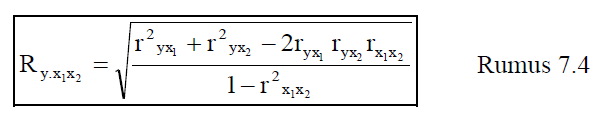

In [35]:
#Menghitung r
r_yx1 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][11:], df_tourist['Total'][24:])[0]
r_yx2 = stats.spearmanr(df_vaccine['Vaksin 1 Kumulatif'], df_tourist['Total'][24:])[0]
r_x1x2 = stats.spearmanr(df_monthly['Positif Bulanan (Indonesia)'][11:], df_vaccine['Vaksin 1 Kumulatif'])[0]

#Menghitung R
R = (((r_yx1)**2 + (r_yx2)**2 - (2*r_yx1*r_yx2*r_x1x2))/((1-(r_x1x2)**2)))**(0.5)
print("Korelasi berganda antara jumlah kasus positif baru bulanan dan total vaksin kumulatif (secara simultan) terhadap jumlah wisatawan adalah", R)

Korelasi berganda antara jumlah kasus positif baru bulanan dan total vaksin kumulatif (secara simultan) terhadap jumlah wisatawan adalah 0.9213151891331391
